# **ES_2:** Edge detection
Group: Emilio Brambilla, Lasse Haffke, Moritz Lahann


# 0. Imports

In [233]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

IMG_DIMENSION = (5,5)

def img_show(image):
  #image show
  plt.figure(figsize= IMG_DIMENSION)
  plt.imshow(image, cmap='gray')

# 1. Bullet-Point

> Load the image woman.png provided.  Note that it is already grayscale

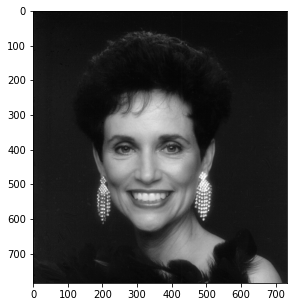

In [234]:
image = cv2.imread('greyscale.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

img_show(image,)

# 2. Bullet-Point

> Using **skimage.util.randomnoise**, 

>add Gaussian distributed noise to the image with a variance of **0.01**. 

>This gives you a noisy image **N**.

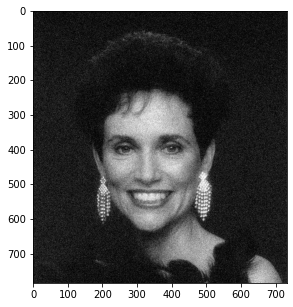

In [235]:
from skimage.util import random_noise
#Noisy image
N = random_noise(image, mode='gaussian', var=0.01)

img_show(N)

# 3. Bullet-Point

> Apply **skimage.filters.gaussian** to filter N.


> Use σ = 1.0.  This gives you a smoothed image S

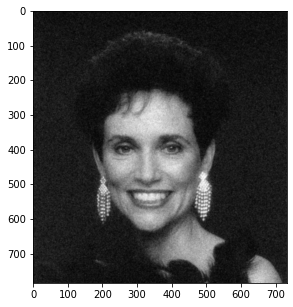

In [236]:
from skimage.filters import gaussian
#Smoothed image
S = gaussian(N, sigma = 1.0)

img_show(S)

# 4. Bullet-Point

> Use the function **skimage.filters.sobel**

> This function applies the two Sobel kernels(horizontal and vertical) on the image, and then computes the root of the squared sumof the results.





In [237]:
from skimage.filters import sobel

#sobel noisy
F_n = sobel(N)
#sobel smoothed
F_s = sobel(S)

# 5. Bullet-Point 

> Visualize the result of applying the function on the noisy image N, and on the smoothedimage S.

> Suppose the output of the sobel function on the noisy image is **F_n** and the output on the smoothed image as **F_s**.


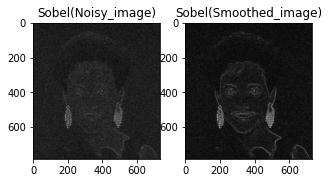

In [239]:
fig, ax = plt.subplots(1,2, figsize = IMG_DIMENSION )
ax[0].imshow(F_n,  cmap='gray')
ax[1].imshow(F_s,  cmap='gray')

ax[0].title.set_text('Sobel(Noisy_image)')
ax[1].title.set_text('Sobel(Smoothed_image)')

# 6. Bullet-Point

> Select two threshold values **t_n** and **t_s** for edge detection.

> Draw **histograms of intensity** values in **F_s** and **F_n** to come up with suitable threshold values.

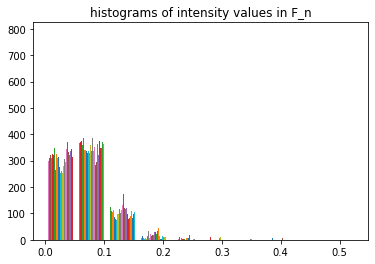

In [240]:
import numpy as np

#searchig t_n
plt.title('histograms of intensity values in F_n')
weights_n, bins_n, _ = plt.hist(F_n)


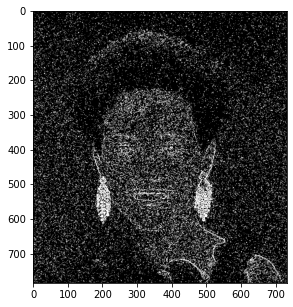

In [241]:
threshold= 0.11
max_val = 0.5
_, t_n = cv2.threshold(F_n, threshold, max_val, cv2.THRESH_BINARY)

img_show(t_n)

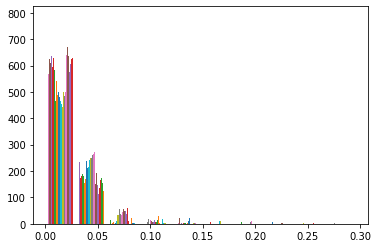

In [242]:
#searchig t_s
weights_s, bins_s, _ = plt.hist(F_s)

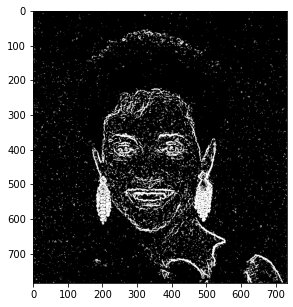

In [243]:
threshold= 0.05
max_val = 0.3
_, t_s = cv2.threshold(F_s, threshold, max_val, cv2.THRESH_BINARY)

img_show(t_s)

# 7. Bullet-Point

>Create a **binary mask** by applying the logical operations (**F_n> t_n**) and (**F_s> t_s**) in NumPy.

>The parts of the image where the threshold is exceeded (there is an edge) are indicated by **true values**.  

>Visualize the binary masks.

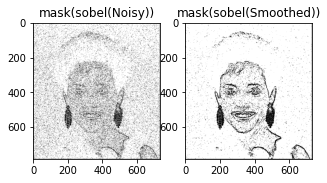

In [245]:
F_n_mask = F_n > t_n
F_s_mask = F_s > t_s


fig, ax = plt.subplots(1,2, figsize = IMG_DIMENSION )
ax[0].imshow(F_n_mask,  cmap='gray')
ax[1].imshow(F_s_mask,  cmap='gray')

ax[0].title.set_text('mask(sobel(Noisy))')
ax[1].title.set_text('mask(sobel(Smoothed))')

# 8. Bullet-Point

>Tune your threshold values until the detected edges show the outline of the woman’s face

In [246]:
#did it in point 6 
#parameters: threshold & max_val

# 9. Bullet-Point

>Did you notice it is almost impossible to tune the threshold for the noisy image to show just the outline of the face?  Why is edge detection improved by applying smoothing?

* Edges are represented by the slopes of a signal.
* to find these edgese we calculate the derivate.
* If the signal is a bit noisy, its derivate is heavily impacted.
* Therefore, it's better to apply smoothing functions 

from slides:
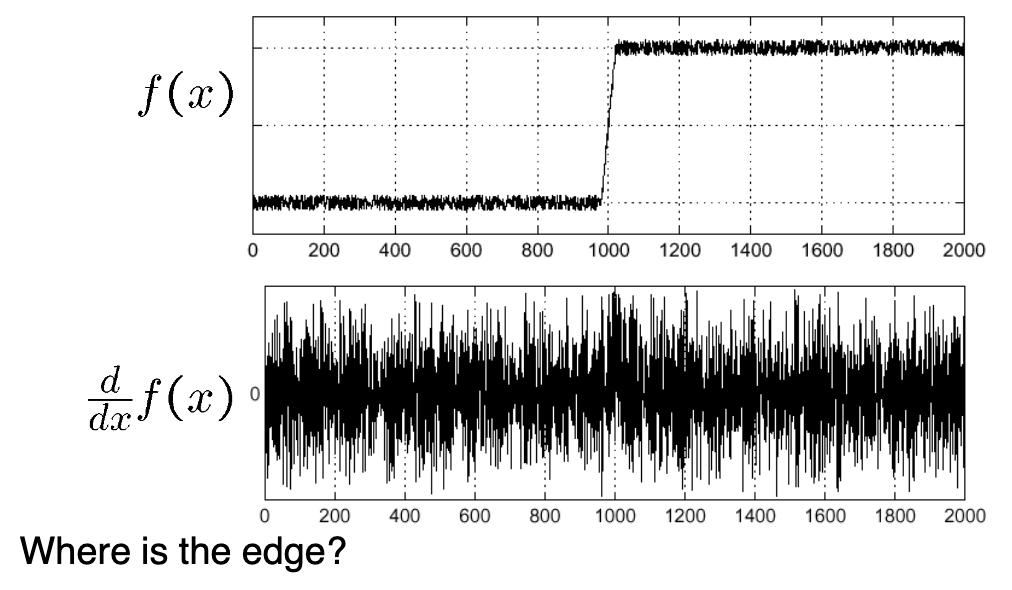